# AI Capstone Project - Part 1 - EDA

In [1]:
import os
import json
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Use the function fetch_data available in helper/cslib module which was provided with this solution to fetch data from the source. 

Returns a dataframe

In [2]:
from helper.cslib import *

In [3]:
#fetch relevant data
base_dir = '/Users/trozmus/Documents/development/AICoursera4/ai-workflow-capstone/assigment'
run_start = time.time()
data_dir = os.path.join(base_dir,"data","cs-train")
print("...fetching data")

df_raw = fetch_data(data_dir)

m, s = divmod(time.time()-run_start,60)
h, m = divmod(m, 60)
print("load time:", "%d:%02d:%02d"%(h, m, s))

...fetching data
load time: 0:00:08


Investigate the  data

In [4]:
df_raw.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,17998.0,28,489562,11,5.95,84656,1,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


In [5]:
df_raw.shape

(815011, 10)

In [6]:
df_raw.dtypes

country                 object
customer_id            float64
day                      int64
invoice                 object
month                    int64
price                  float64
stream_id               object
times_viewed             int64
year                     int64
invoice_date    datetime64[ns]
dtype: object

In [7]:
#Check for missing values in dataframe
df_raw.isnull().sum()

country              0
customer_id     189762
day                  0
invoice              0
month                0
price                0
stream_id            0
times_viewed         0
year                 0
invoice_date         0
dtype: int64

In [8]:
df_raw.describe()

,customer_id,day,month,price,times_viewed,year
count,625249.000000,815011.000000,815011.000000,815011.000000,815011.000000,815011.000000
mean,15333.415068,15.064819,6.592718,4.802631,5.231106,2018.247654
std,1698.360788,8.788845,3.598781,135.058707,5.109982,0.545261
min,12346.000000,1.000000,1.000000,-53594.360000,0.000000,2017.000000
25%,13956.000000,7.000000,3.000000,1.250000,1.000000,2018.000000
50%,15279.000000,15.000000,6.000000,2.100000,3.000000,2018.000000
75%,16813.000000,23.000000,10.000000,4.210000,8.000000,2019.000000
max,18287.000000,31.000000,12.000000,38970.000000,24.000000,2019.000000


In [9]:
ts_df = convert_to_ts(df_raw)

In [10]:
ts_df.head()

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
0,2017-11-01,0,0,0,0,2017-11,0.0
1,2017-11-02,0,0,0,0,2017-11,0.0
2,2017-11-03,0,0,0,0,2017-11,0.0
3,2017-11-04,0,0,0,0,2017-11,0.0
4,2017-11-05,0,0,0,0,2017-11,0.0


In [11]:
ts_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Length: 607, dtype: bool

In [12]:
print("Total records:", df_raw.shape[0])
dupl_records = df_raw.duplicated()
if True in dupl_records:
    df_updated = df_raw[~dupl_records]
print("Deleted {} duplicate rows".format(np.where(dupl_records==True)[0].size))

print("\nCount of missing data values\n")
print(df_updated.isnull().sum(axis = 0))

Total records: 815011
Deleted 28844 duplicate rows

Count of missing data values

country              0
customer_id     182194
day                  0
invoice              0
month                0
price                0
stream_id            0
times_viewed         0
year                 0
invoice_date         0
dtype: int64


In [13]:
table2 = df_raw.groupby(['country'])['price'].sum()
table2 = pd.DataFrame(table2)
table2.reset_index(inplace=True)
table2.columns = ['country', 'revenue']

table3 = df_raw.groupby(['country', 'year'])['price'].sum()
table3 = pd.DataFrame(table3)
table3.reset_index(inplace=True)
table3.columns = ['country', 'year','revenue']

In [14]:
table2.sort_values(by='revenue', inplace=True, ascending=False)
table3.sort_values(by='country', inplace=True, ascending=False)

In [15]:
#top 10
table2.head(10)

,country,revenue
40,United Kingdom,3.521514e+06
11,EIRE,1.070692e+05
15,Germany,4.927182e+04
14,France,4.056514e+04
28,Norway,3.849475e+04
34,Spain,1.604099e+04
17,Hong Kong,1.445257e+04
30,Portugal,1.352867e+04
33,Singapore,1.317592e+04
26,Netherlands,1.232280e+04


In [16]:
#last 10
table2.tail(10)

,country,revenue
23,Lebanon,358.61
12,European Community,294.05
5,Brazil,256.31
37,Thailand,227.97
22,Korea,150.24
42,West Indies,122.77
27,Nigeria,109.28
4,Bermuda,84.70
9,Czech Republic,31.83
32,Saudi Arabia,24.11


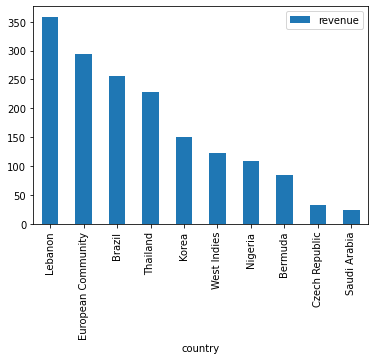

In [17]:
ax2 = table2[-10:].plot.bar(x='country', y='revenue')


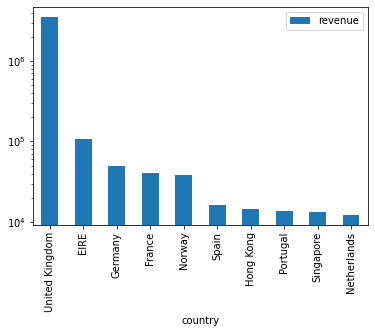

In [18]:
ax3 = table2[:10].plot.bar(x='country', y='revenue')
ax3.set_yscale('log')

In [19]:
top_ten_countries = ["United Kingdom","EIRE","Germany","France","Norway","Spain","Hong Kong","Portugal","Singapore","Netherlands"]

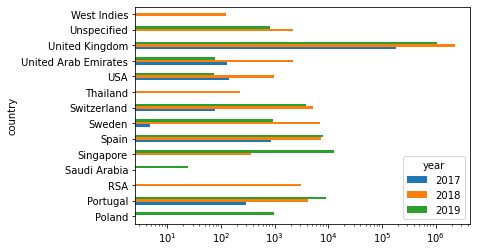

In [20]:
r22 = table3[:30].groupby(['country','year'])['revenue'].sum().unstack()
ax22 = r22.plot.barh()
ax22.set_xscale("log")


Articulate findings using a deliverable with visualizations.

Use the convert_to_ts function available in cslib module to transform the the original DataFrame to a numerically indexed time-series DataFrame by aggregating over each day.

Target variable: revenue

In [21]:
df_ts = convert_to_ts(df_raw)

In [22]:
df_ts.head()

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
0,2017-11-01,0,0,0,0,2017-11,0.0
1,2017-11-02,0,0,0,0,2017-11,0.0
2,2017-11-03,0,0,0,0,2017-11,0.0
3,2017-11-04,0,0,0,0,2017-11,0.0
4,2017-11-05,0,0,0,0,2017-11,0.0


In [23]:
df_ts_rev_views = df_ts.loc[:, ['date','revenue','total_views']]

In [24]:
df_ts_rev = df_ts_rev_views['revenue']
df_ts_views = df_ts_rev_views['total_views']

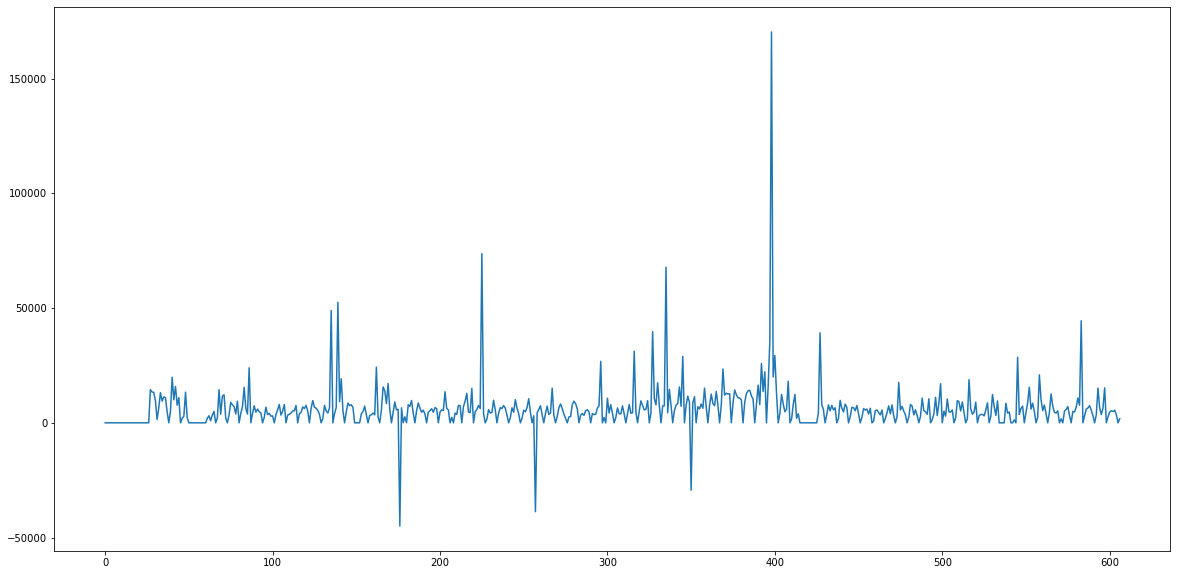

In [25]:
#time series plot of revene on a daily basis
plt.figure(figsize=(20,10))
df_ts_rev.plot()
plt.show()

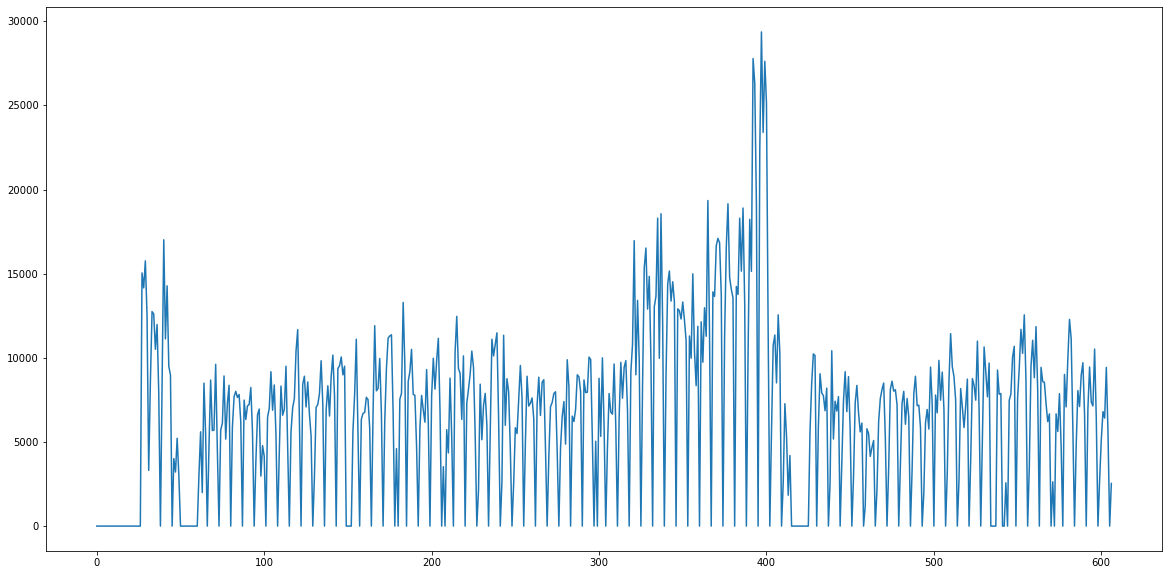

In [26]:
#time series plot of total views on a daily basis
plt.figure(figsize=(20,10))
df_ts_views.plot()
plt.show()